<div style='background :cyan; color:black; padding: 10px; border:2px solid black; text-align:center; border-radius :5px'>
    <h1>La régression linéaire</h1>
</div>

**Objectif :
 Estimer le prix d'un bien à partir des données d'un dataset**  
La régression linéaire est un modèle à la fois basique et interessant lorsque l'on cherche à prédire une valeur quantitative à partir d'un jeu de données labelisé.

## Imports

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Informations sur les données importés

In [3]:
#récupération d'un jeu de données
housing = fetch_california_housing()

In [4]:
#recherche des propriétés
dir(housing)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

## Création d'un dataframe

In [6]:
df = pd.DataFrame( data = housing['data'], columns = housing.feature_names)
df['target'] = housing.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Analyse des données

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


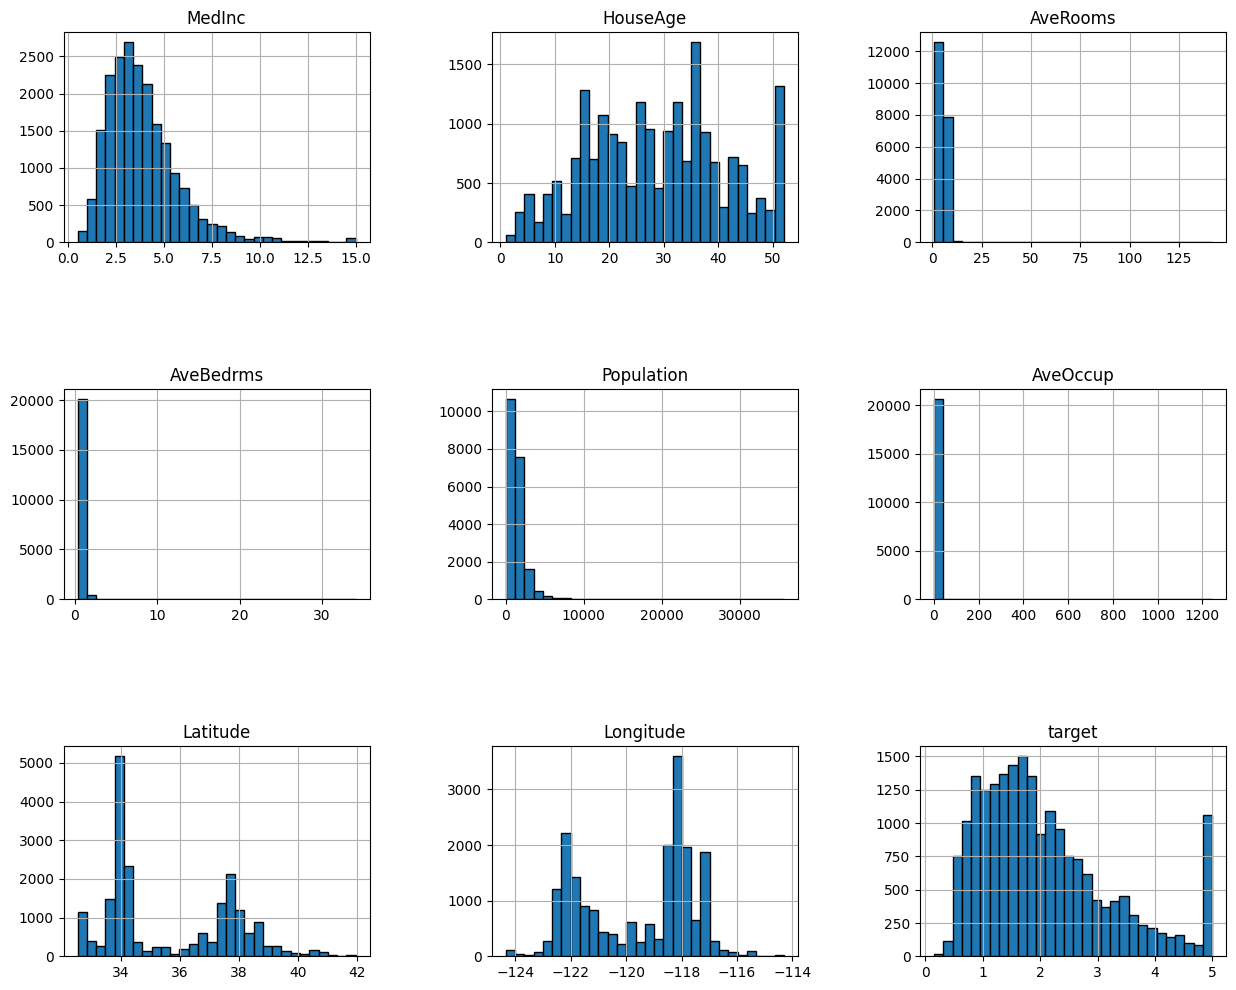

In [8]:
df.hist(figsize=(15, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)


**Suite à la visualisation des données on remarque qu'il y a des valeurs anormales dans la colonne target. Nous allons supprimer toutes les données correspondant à des maisons dont le prix est supérieur ou égal à 5 ( 500 000 $ )**


In [9]:
old_len = len(df)
df.query("target <= 5", inplace = True )
print ("Nous avons supprimé {} lignes du dataframe".format(old_len - len(df)))

Nous avons supprimé 965 lignes du dataframe


## Recherche de valeurs corrélés

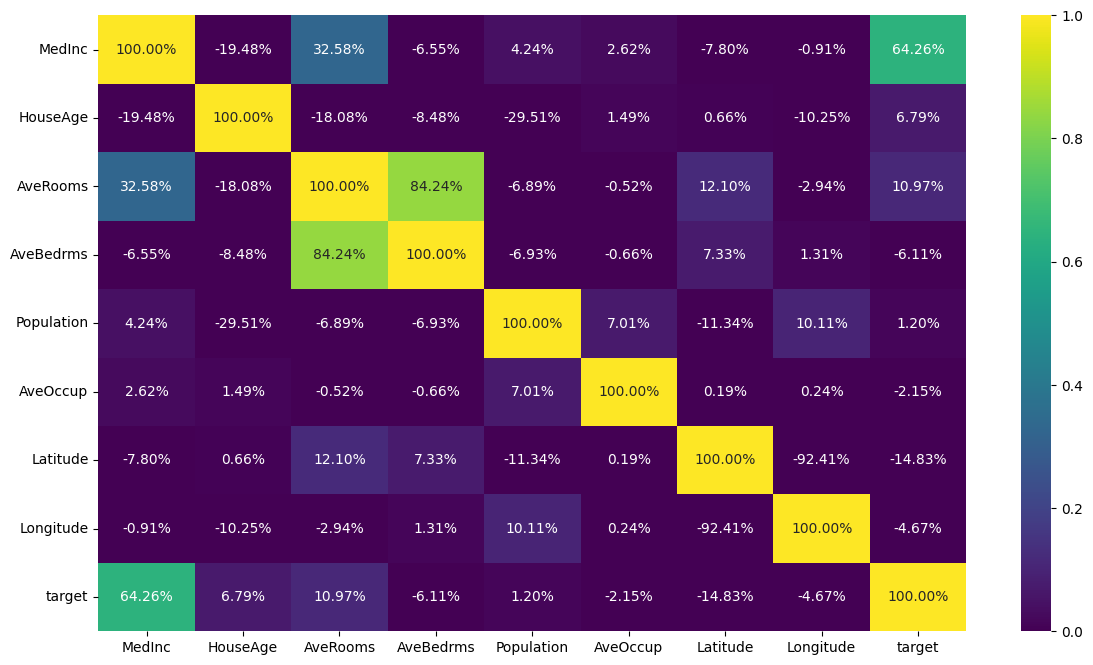

In [10]:
#YOUR CODE 
plt.figure(figsize=(14, 8))
heatmap = sns.heatmap(df.corr(), fmt=".2%", vmin=0, vmax=1, annot=True, cmap = plt.colormaps['viridis'])
plt.show()

**Conclusion** : Le prix de la maison ( target ) semble fortement corrélé au revenus de ses occupant ( MedInc ) et très peu corrélé avec les autres caractéristiques. 

# Entrainement d'un modèle de régression linéaire simple  

Nous faisons le choix d'entrainer le modèle avec une seule caractéristique comme nous l'avons déterminé ci-dessus.   

**L'équation de notre modèle est de la forme :**  
y = a1.x1 + a0


où y est la target  
où x1 est notre feature ( MedInc )   
où a0 représente l'ordonnée à l'origine   
où a1 est le coefficient directeur de la droite

In [11]:
#features
X = df[['MedInc']]
#target
y = df.target

## Préparation de sets de training et de test
  
75% des échantillons sont affectés à l'ensemble de training  
25% des échantillons sont affectés à l'ensemble de test 

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10)
print("Il y a {} lignes de données attribués à notre set de training.\nIl y a {} lignes de données attribués à notre set de test".format(len(X_train), len(X_test)))

Il y a 14756 lignes de données attribués à notre set de training.
Il y a 4919 lignes de données attribués à notre set de test


In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)

#Calculer la précision
sc = model.score(X_test, y_test)
rmse = (mean_squared_error(y_train, predictions))

a0 = model.intercept_
a1 = model.coef_
print("Un modèle mathématique répondant à l'équation d'une régression linéaire à été entrainé")

print("Coefficient directeur ( pente ):", a1[0] )
print("Coefficient d'interception:", a0)

print("\nEn comparant nos valeur prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))
print("Le score RMSE est le suivant : {}".format(rmse))


Un modèle mathématique répondant à l'équation d'une régression linéaire à été entrainé
Coefficient directeur ( pente ): 0.40126015061360965
Coefficient d'interception: 0.44442368948993116

En comparant nos valeur prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.4058460479503989.
Le score RMSE est le suivant : 0.5545464917833166


Le score RMSE calculé permet de quantifier la marge d'erreur. La valeur de 0.55 signifie que notre erreur est de plus ou moins 550 000 $.

## Visualisation régression linéaire simple

La visualisation ci-dessous nous permet de voir la droite calculée par notre modèle.      
En se basant sur la droite en rouge, on peut estimer la prix de la maison en ordonnée correspondant à l'abcisse MedInc.

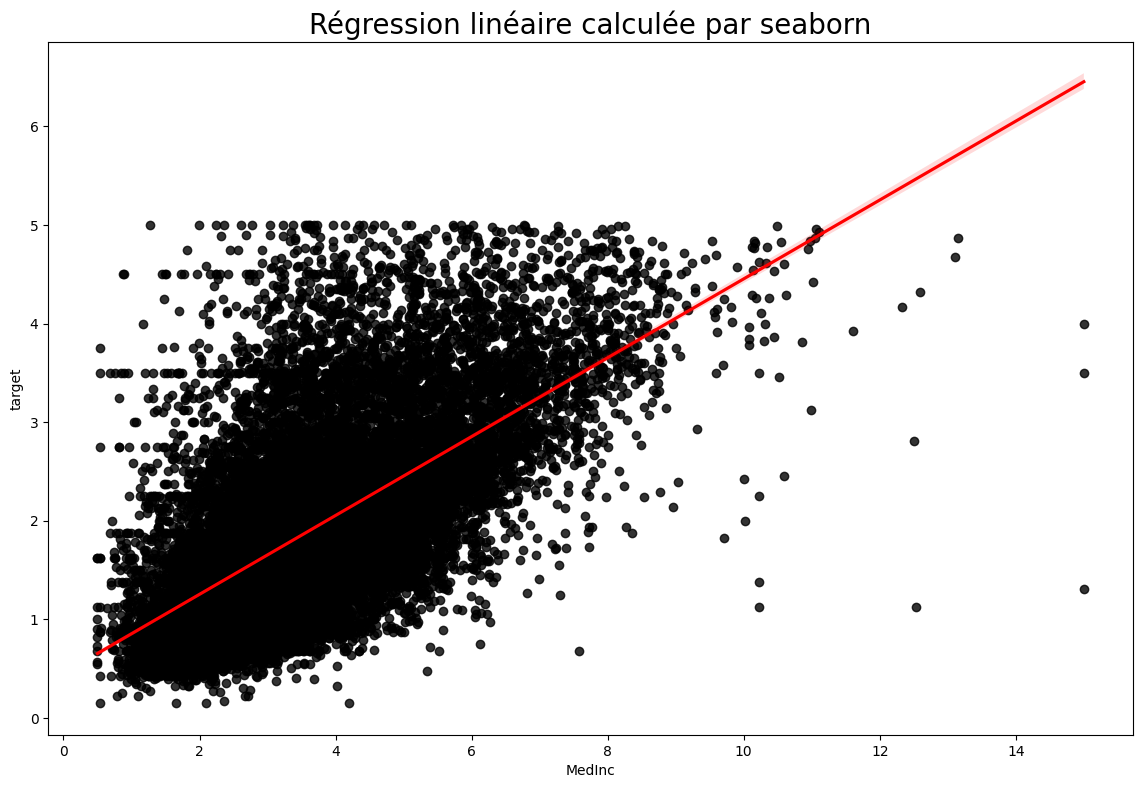

In [14]:
# plot the regression with seaborn
plt.figure(figsize=(14,9))
plt.title('Régression linéaire calculée par seaborn', fontsize=20)
sns.regplot(
    y = "target",
    x = "MedInc",
    scatter_kws={"color": "black"}, line_kws={"color": "red"},
    data = df)

plt.show()

# Entrainement d'un modèle de régression linéaire multiples

Le score de précision obtenue précédemment n'étant pas satisfaisant nous essayons d'entrainer notre modèle avec plusieurs caractéristiques afin d'obtenir des prédictions plus précises.  

Nous choisissons ici d'entrainer le modèle avec toutes les caractéristiques connus.

**L'équation de notre modèle sera de la forme suivante :**  
y = a0 + a1.x1 + a2x2 + anxn 
  
Notre modèle n'est plus représentable en 2 dimensions.

In [15]:
#features
X = df.loc[: ,df.columns != 'target']
#target
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 10)
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_train)

#Calculer la précision
sc = model.score(X_test, y_test)
rmse = (mean_squared_error(y_train, predictions))
print("\nEn comparant les valeurs prédites avec celles attendues, nous obtenons le score de précision suivant : \n{}.".format(sc))
print("Le score RMSE est le suivant : {}".format(rmse))



En comparant nos valeur prédites avec celles attendues, nous obtenons le score de précision suivant : 
0.5495747451203776.
Le score RMSE est le suivant : 0.4030841890751381


<p>Le score de précision est meilleur. ( Plus R2 est proche de 1, meilleure est la prédiction )</p>

<p>On pourrait peut-être améliorer les précisions du modèle, en sélectionnant mieux les caractéristiques que l'on choisit pour entrainer celui-ci. </p>
